### Worldwide PM Polution and Related Mortality

Link: https://www.kaggle.com/datasets/catiateixeira/wordwide-pm-polution-and-related-mortality

In [91]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, spearmanr, mannwhitneyu, kruskal
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AirQuality.csv'
data = pd.read_csv(file_path)

# Print the data
print(tabulate(data, headers='keys', tablefmt='psql'))

+-----+------------------------+--------+-----------+-----------+---------------+------------+---------------+
|     | Country                |   Year |     PM2.5 |      PM10 |   TotalDeaths |   PMDeaths |   CitiesCount |
|-----+------------------------+--------+-----------+-----------+---------------+------------+---------------|
|   0 | Albania                |   2015 |  21.79    |  32.415   |      42.2998  |   21.7861  |             2 |
|   1 | Albania                |   2016 |  21.48    |  32.385   |      41.0188  |   20.8107  |             2 |
|   2 | Argentina              |   2015 |  10.26    |  27.87    |      33.0869  |   29.1591  |             1 |
|   3 | Australia              |   2010 |   8.04    |  15.3233  |      13.5717  |   13.1404  |             3 |
|   4 | Australia              |   2011 |   7.31667 |  14.4433  |      13.7276  |   13.2767  |             3 |
|   5 | Australia              |   2012 |   8.64    |  17.392   |      12.6597  |   12.1964  |             5 |
|

In [92]:
# Uji Asumsi: Normalitas, Homogenitas Varians, Multikolinearitas

# 1. Uji Normalitas
shapiro_total_deaths = shapiro(data['TotalDeaths'])
shapiro_pm_deaths = shapiro(data['PMDeaths'])

# 2. Uji Homogenitas Varians
levene_test_pm25_pm10 = levene(data['PM2.5'], data['PM10'])
levene_test_total_pm_deaths = levene(data['TotalDeaths'], data['PMDeaths'])

# 3. Uji Multikolinearitas (VIF)
X = data[['PM2.5', 'PM10', 'CitiesCount']]
X = sm.add_constant(X)  # menambahkan konstanta

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menampilkan hasil uji asumsi
print("Shapiro-Wilk Test for TotalDeaths:", shapiro_total_deaths)
print("Shapiro-Wilk Test for PMDeaths:", shapiro_pm_deaths)
print("Levene Test for Homogeneity of Variances (PM2.5 vs PM10):", levene_test_pm25_pm10)
print("Levene Test for Homogeneity of Variances (TotalDeaths vs PMDeaths):", levene_test_total_pm_deaths)
print("Variance Inflation Factors (VIF):\n", vif_data)

Shapiro-Wilk Test for TotalDeaths: ShapiroResult(statistic=np.float64(0.7969685505316983), pvalue=np.float64(4.289402602618286e-20))
Shapiro-Wilk Test for PMDeaths: ShapiroResult(statistic=np.float64(0.91073375604564), pvalue=np.float64(3.8312929077092457e-13))
Levene Test for Homogeneity of Variances (PM2.5 vs PM10): LeveneResult(statistic=np.float64(30.24106000994237), pvalue=np.float64(5.447982039586415e-08))
Levene Test for Homogeneity of Variances (TotalDeaths vs PMDeaths): LeveneResult(statistic=np.float64(46.24177381002594), pvalue=np.float64(2.332980958781692e-11))
Variance Inflation Factors (VIF):
        feature       VIF
0        const  2.779282
1        PM2.5  3.983816
2         PM10  4.033629
3  CitiesCount  1.041110


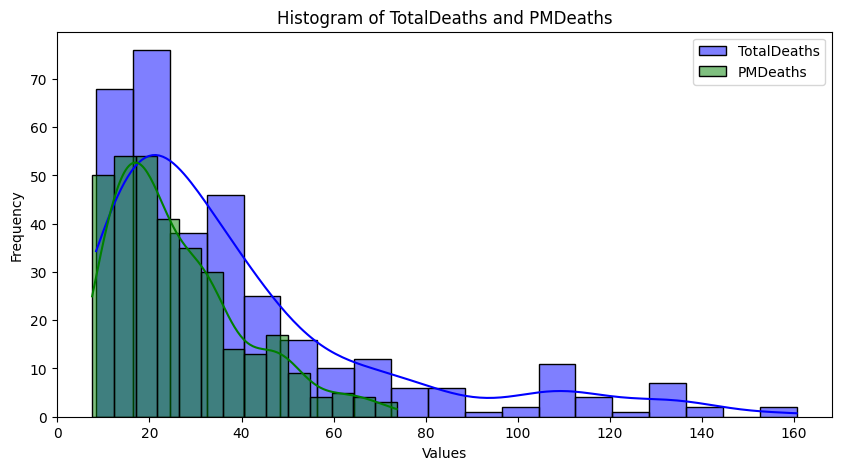

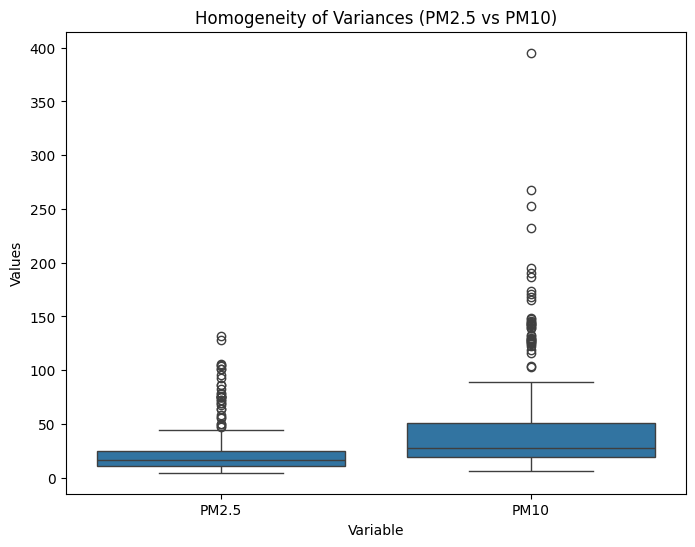

In [93]:
# Grafik untuk uji normalitas
plt.figure(figsize=(10, 5))
sns.histplot(data['TotalDeaths'], kde=True, color='blue', label='TotalDeaths')
sns.histplot(data['PMDeaths'], kde=True, color='green', label='PMDeaths')
plt.title('Histogram of TotalDeaths and PMDeaths')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Grafik untuk uji homogenitas varians
plt.figure(figsize=(8, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(data[['PM2.5', 'PM10']]))
plt.title('Homogeneity of Variances (PM2.5 vs PM10)')
plt.xlabel('Variable')
plt.ylabel('Values')
plt.show()

In [94]:
# Transformasi Data

# Transformasi log untuk TotalDeaths dan PMDeaths
data['Log_TotalDeaths'] = np.log(data['TotalDeaths'] + 1)
data['Log_PMDeaths'] = np.log(data['PMDeaths'] + 1)

# Uji normalitas setelah transformasi
shapiro_log_total_deaths = shapiro(data['Log_TotalDeaths'])
shapiro_log_pm_deaths = shapiro(data['Log_PMDeaths'])

print("Shapiro-Wilk Test for Log_TotalDeaths:", shapiro_log_total_deaths)
print("Shapiro-Wilk Test for Log_PMDeaths:", shapiro_log_pm_deaths)

Shapiro-Wilk Test for Log_TotalDeaths: ShapiroResult(statistic=np.float64(0.9715475337385764), pvalue=np.float64(3.9162063763790304e-06))
Shapiro-Wilk Test for Log_PMDeaths: ShapiroResult(statistic=np.float64(0.9841379665711056), pvalue=np.float64(0.0009964483420827432))


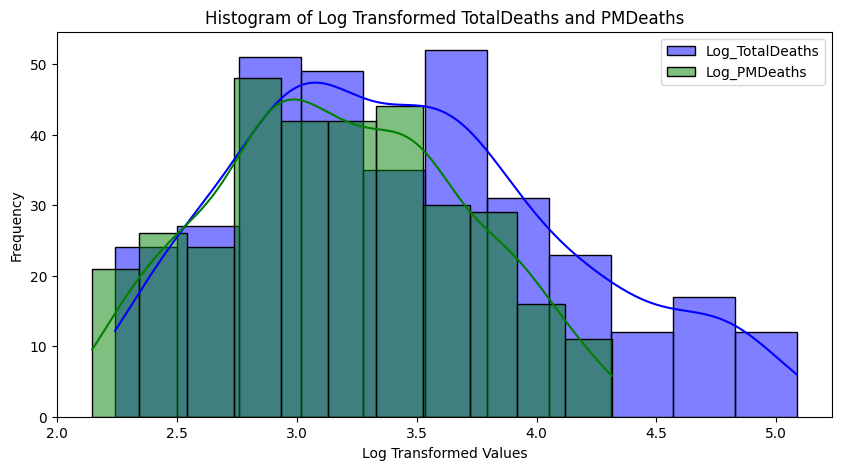

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik histogram untuk data yang telah di-transformasi
plt.figure(figsize=(10, 5))
sns.histplot(data['Log_TotalDeaths'], kde=True, color='blue', label='Log_TotalDeaths')
sns.histplot(data['Log_PMDeaths'], kde=True, color='green', label='Log_PMDeaths')
plt.title('Histogram of Log Transformed TotalDeaths and PMDeaths')
plt.xlabel('Log Transformed Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [96]:
# Hipotesis A: Uji Korelasi
corr_pm25_totaldeaths = spearmanr(data['PM2.5'], data['TotalDeaths'])
corr_pm10_totaldeaths = spearmanr(data['PM10'], data['TotalDeaths'])
print("Spearman Correlation between PM2.5 and TotalDeaths:", corr_pm25_totaldeaths)
print("Spearman Correlation between PM10 and TotalDeaths:", corr_pm10_totaldeaths)

Spearman Correlation between PM2.5 and TotalDeaths: SignificanceResult(statistic=np.float64(0.8339835041631326), pvalue=np.float64(1.7658144274378695e-87))
Spearman Correlation between PM10 and TotalDeaths: SignificanceResult(statistic=np.float64(0.8337237660341695), pvalue=np.float64(2.2349255815316417e-87))


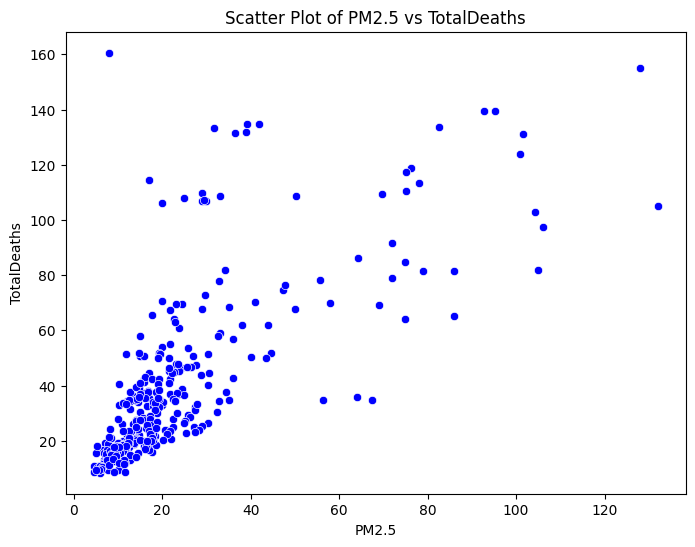

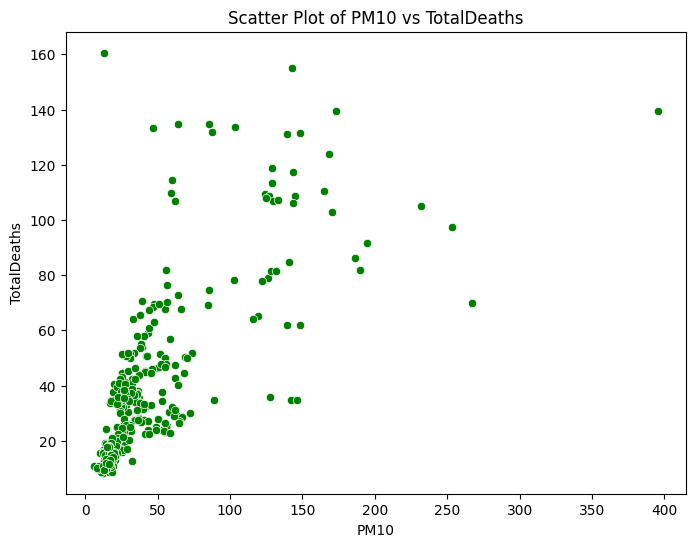

In [97]:
# Scatter plot untuk PM2.5 vs TotalDeaths
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='TotalDeaths', data=data, color='blue')
plt.title('Scatter Plot of PM2.5 vs TotalDeaths')
plt.xlabel('PM2.5')
plt.ylabel('TotalDeaths')
plt.show()

# Scatter plot untuk PM10 vs TotalDeaths
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM10', y='TotalDeaths', data=data, color='green')
plt.title('Scatter Plot of PM10 vs TotalDeaths')
plt.xlabel('PM10')
plt.ylabel('TotalDeaths')
plt.show()

In [98]:
# Hipotesis B: Uji Beda (Mann-Whitney U Test)
years = data['Year'].unique()
year1_pm25 = data[data['Year'] == years[0]]['PM2.5']
year2_pm25 = data[data['Year'] == years[1]]['PM2.5']
mannwhitney_test_pm25 = mannwhitneyu(year1_pm25, year2_pm25)

year1_pm10 = data[data['Year'] == years[0]]['PM10']
year2_pm10 = data[data['Year'] == years[1]]['PM10']
mannwhitney_test_pm10 = mannwhitneyu(year1_pm10, year2_pm10)

print("Mann-Whitney U Test for PM2.5 between years:", mannwhitney_test_pm25)
print("Mann-Whitney U Test for PM10 between years:", mannwhitney_test_pm10)

Mann-Whitney U Test for PM2.5 between years: MannwhitneyuResult(statistic=np.float64(1560.5), pvalue=np.float64(0.9767731580105359))
Mann-Whitney U Test for PM10 between years: MannwhitneyuResult(statistic=np.float64(1584.0), pvalue=np.float64(0.9188352324980709))


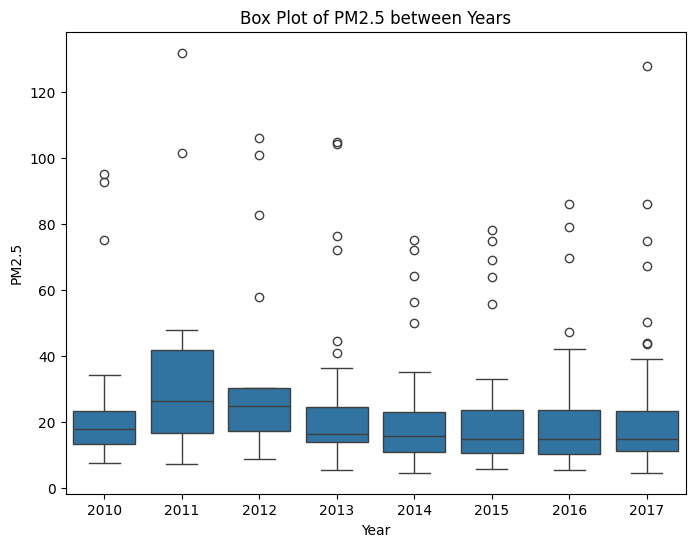

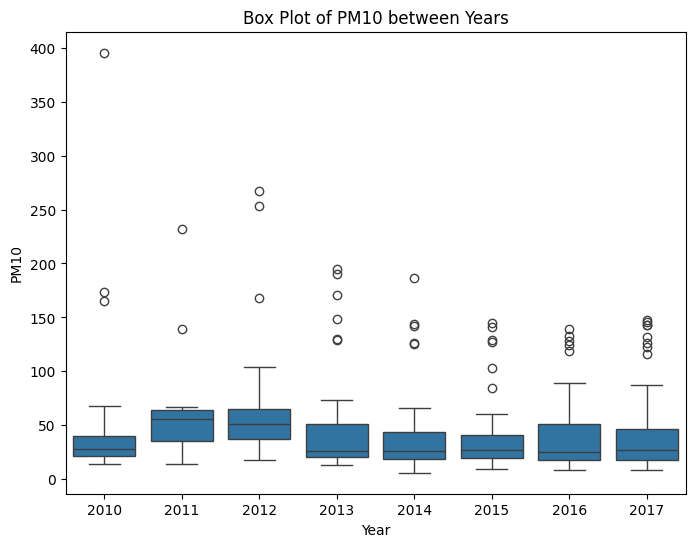

In [99]:
# Box plot untuk PM2.5 antara tahun pertama dan tahun kedua
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='PM2.5', data=data)
plt.title('Box Plot of PM2.5 between Years')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.show()

# Box plot untuk PM10 antara tahun pertama dan tahun kedua
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='PM10', data=data)
plt.title('Box Plot of PM10 between Years')
plt.xlabel('Year')
plt.ylabel('PM10')
plt.show()

In [100]:
# Hipotesis C: Uji Regresi Linear Berganda
X = data[['PM2.5', 'PM10']]
y = data['PMDeaths']
X = sm.add_constant(X)  # menambahkan konstanta
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PMDeaths   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           4.79e-40
Time:                        10:33:43   Log-Likelihood:                -1266.8
No. Observations:                 333   AIC:                             2540.
Df Residuals:                     330   BIC:                             2551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1944      0.885     18.292      0.0

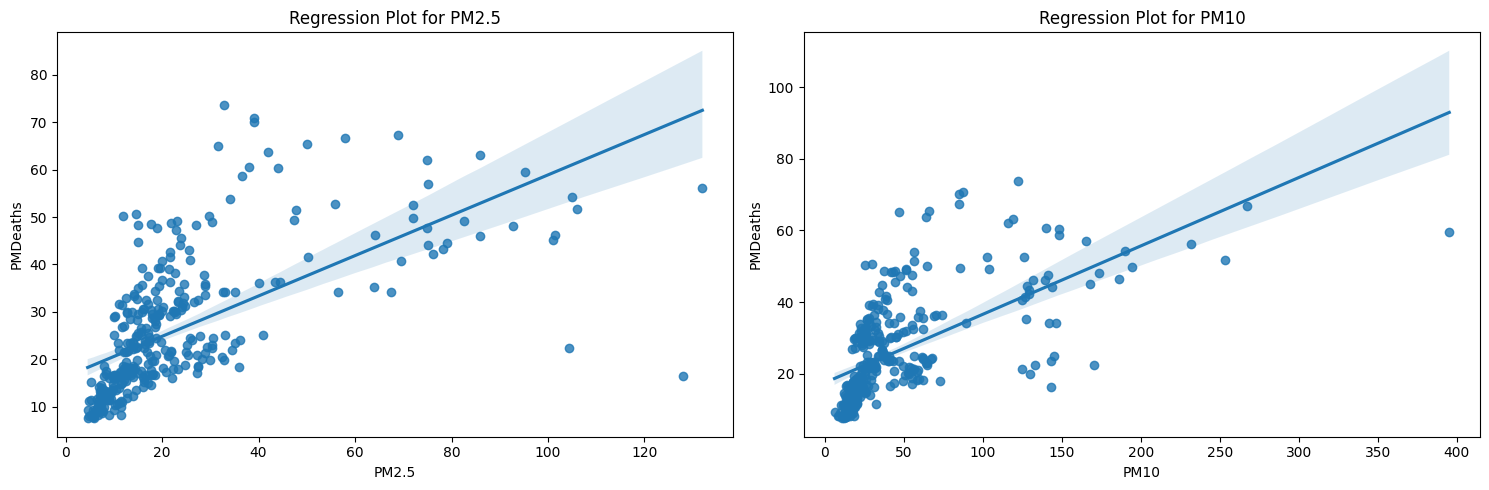

In [101]:
# Plotting regresi untuk masing-masing variabel
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
for i, var in enumerate(['PM2.5', 'PM10']):
    sns.regplot(x=var, y='PMDeaths', data=data, ax=axs[i])
    axs[i].set_title(f'Regression Plot for {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('PMDeaths')
plt.tight_layout()
plt.show()